In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

import model_based_agent as mba

In [34]:
folder = './Data/OnlyDet01-02-13-11/'
pres = []
trials = []
post = []
for i in range(15):
    with open(folder+'det'+str(i)+'.pkl','rb') as f:
        pres.append(pickle.load(f))

In [35]:
pres[0].keys()

dict_keys(['loc', 't', 'endpts', 'obs', 'reward', 'target', 'action'])

In [36]:
i=0
pres_n = {}
for k in pres[i].keys():
    pres_n[k] = np.array(pres[i][k]).flatten()
for i in np.arange(14)+1:
    for k in pres[i].keys():
        pres_n[k] = np.append(pres_n[k],pres[i][k])
pres_n['loc'] = pres_n['loc'].reshape(-1,2)
pres_n['obs'] = pres_n['obs'].reshape(-1,2)*180

(array([1555.,  618.,  339.,  685., 1432.,  759., 1354.,  686.,  237.,
        2013.]),
 array([-180., -147., -114.,  -81.,  -48.,  -15.,   18.,   51.,   84.,
         117.,  150.]),
 <BarContainer object of 10 artists>)

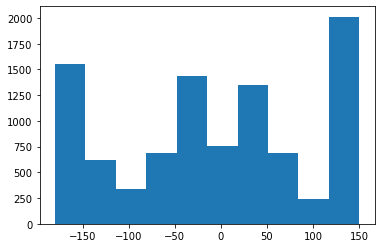

In [48]:
plt.hist(pres_n['obs'][:,1])

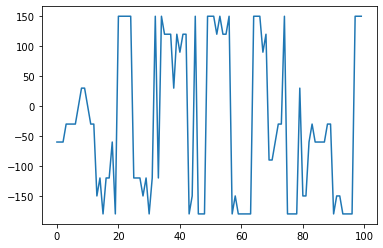

In [67]:
plt.plot(pres_n['obs'][:,1][9000:9100])

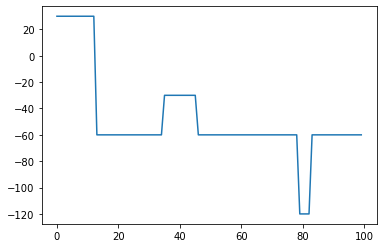

In [69]:
plt.plot(pres_n['obs'][:,0][9000:9100])

In [65]:
pres_n['target'][9600]

270

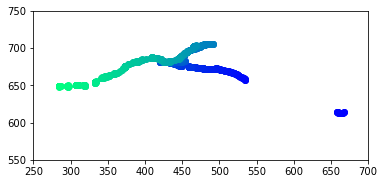

In [63]:
locs = pres_n['loc'][9000:]
NPOINTS = len(locs)
start = 0
fig,ax = plt.subplots(1)
plt.ylim((550,750))
plt.xlim((250,700))

ax.set_prop_cycle('color',plt.cm.winter(np.linspace(0,1,NPOINTS)))
for i in np.arange(start,start+NPOINTS-1):
    img = ax.scatter(locs[i,0],locs[i,1])
    ax.set_aspect('equal','box')

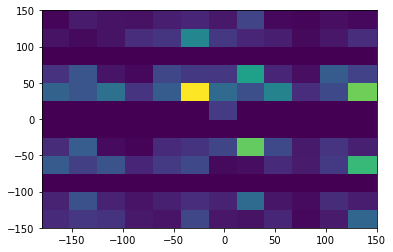

In [38]:
plt.hist2d(pres_n['obs'][:,1],pres_n['obs'][:,0],bins=12);

In [42]:
def get_model_from_files(files,lp_frac):
    dh = mba.DataHandler()
    dh.load_df(files[0]+'alls.pkl')
    for f in files[1:]:
        dh.add_df_to_df([f+'alls.pkl'])
#     mset = eme.ModelSet(1,frac=1,lp_frac=lp_frac)
#     mset.make_models(dh,sm_pars={'lambda':.1,'iters':10})
    return dh


files = ['./Data/HTFix19-01-18-47/',
           './Data/HTFix19-01-20-29/',
           './Data/HTFix19-01-21-18/',
           './Data/HTFix20-01-09-04/',
           './Data/HTFix20-01-09-42/',
           './Data/HTFix20-01-10-41/',
          ]
files = ['../01_13_reals/'+f[2:] for f in files]

dh = get_model_from_files(files,.4)

In [43]:
dh.df

,t,obs_b,angs,prev_actions,reward,loc,target,obs_h,next_obs_b,next_obs_h
0,0.984,-30,"[90, 270]",3,6.421441,"[1007.8554216867469, 1002.0602409638554]",90,30.0,-30.0,30.0
1,1.172,-30,"[90, 270]",2,6.134315,"[1008.2528735632184, 1000.9195402298851]",90,30.0,-30.0,30.0
2,1.375,-30,"[90, 270]",1,6.425035,"[1008.3827160493827, 1000.469135802469]",90,30.0,-30.0,30.0
3,1.562,-30,"[90, 240]",0,6.587415,"[1008.6585365853659, 999.7317073170732]",90,30.0,-30.0,30.0
4,1.765,-30,"[90, 240]",0,6.356707,"[1008.6470588235295, 999.3764705882354]",90,30.0,-30.0,60.0
...,...,...,...,...,...,...,...,...,...,...
47319,235.000,30,"[240, 120]",0,0.400000,"[101.6, 845.2]",180,30.0,120.0,-90.0
47320,297.797,120,"[210, 90]",2,0.666667,"[89.0, 888.0]",180,-90.0,120.0,-30.0
47321,297.984,120,"[270, 90]",3,0.666667,"[88.57142857142857, 886.2857142857143]",180,-30.0,120.0,-30.0
47322,298.156,120,"[270, 90]",2,0.071429,"[88.42857142857143, 887.2857142857143]",180,-30.0,120.0,-30.0


(array([  168.,  1124.,  1994.,  5988., 12091.,  5806.,  9830.,  7071.,
         1805.,  1447.]),
 array([-180., -147., -114.,  -81.,  -48.,  -15.,   18.,   51.,   84.,
         117.,  150.]),
 <BarContainer object of 10 artists>)

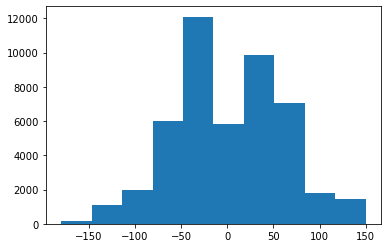

In [46]:
plt.hist(dh.df['obs_h'].to_numpy())